In [80]:
# -*- coding: utf-8 -*-
"""
Created on Sun august 21 14:35:15 2016
@author: Sidon
"""
%matplotlib inline
import pandas as pd
import numpy as np
from collections import OrderedDict
from tabulate import tabulate, tabulate_formats
import seaborn as sn
import matplotlib.pyplot as plt
import scipy.stats 
import statistics as st
import statsmodels.formula.api as smf

# bug fix for display formats to avoid run time errors
pd.set_option('display.float_format', lambda x:'%f'%x)

# Load from CSV
data1 = pd.read_csv('~/dev/coursera/gapminder.csv', skip_blank_lines=True,
                    usecols=['country','alcconsumption','lifeexpectancy'])
 
# Rename columns for clarity                                    
data1.columns = ['country','alcohol','life']

# Variables Descriptions
ALCOHOL = "2008 alcohol consumption per adult (liters, age 15+)"
LIFE = "2011 life expectancy at birth (years)"

# converting to numeric values and parsing (numeric invalids=NaN)
for dt in ('income','life') :
   data1[dt] = pd.to_numeric(data1[dt], 'errors=coerce') 

# Remove rows with nan values
data1 = data1.dropna(axis=0, how='any')

# Copy dataframe for univariate categorical variables
data2 = data1.copy()

In [81]:
print (data1.alcohol.min(), data1.alcohol.max())
print ('\n', data1.life.min(), data1.life.max())

0.03 23.01

 47.794 83.394


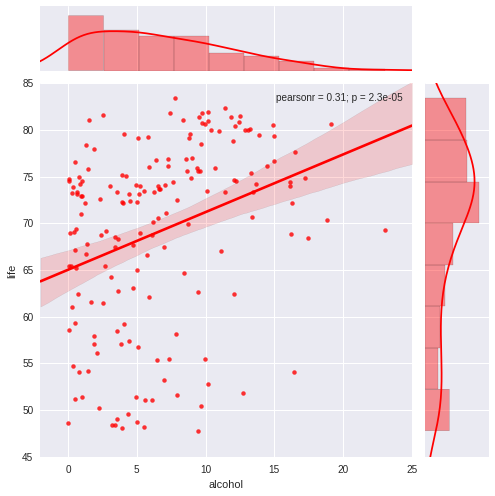

In [82]:
sn.jointplot("alcohol", "life", data=data1, kind="reg",
                  xlim=(-2, 25), ylim=(45, 85), color="r", size=7)

In [83]:
mean = data1.alcohol.mean()
data1['alcohol_center'] = data1.alcohol-mean
measures = [data1.alcohol.mean(), data1.alcohol_center.mean(), 
            data1.alcohol_center.min(), data1.alcohol_center.max(),
            data1.life.min(), data1.life.max()]
headers = ['Mean','Center','cMin', 'cMax', 'Min life', 'Max life']

print (tabulate([measures], tablefmt='grid', headers=headers))

+---------+--------------+----------+---------+------------+------------+
|    Mean |       Center |     cMin |    cMax |   Min life |   Max life |
+=========+==============+==========+=========+============+============+
| 6.64625 | -1.14807e-15 | -6.61625 | 16.3637 |     47.794 |     83.394 |
+---------+--------------+----------+---------+------------+------------+


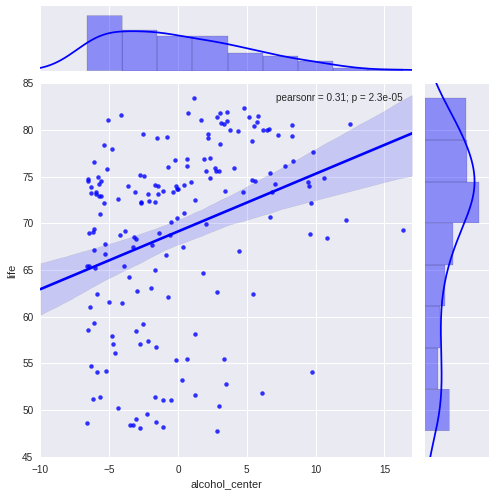

In [84]:
sn.jointplot("alcohol_center", "life", data=data1, kind="reg",
                  xlim=(-10,17), ylim=(45, 85), color="b", size=7)

In [85]:
print ("OLS regression model for the association between life expectancy and income level")
reg1 = smf.ols('life ~ alcohol', data=data1).fit()
print (reg1.summary())

OLS regression model for the association between life expectancy and income level
                            OLS Regression Results                            
Dep. Variable:                   life   R-squared:                       0.098
Model:                            OLS   Adj. R-squared:                  0.093
Method:                 Least Squares   F-statistic:                     18.90
Date:                Sat, 24 Sep 2016   Prob (F-statistic):           2.34e-05
Time:                        10:10:59   Log-Likelihood:                -642.36
No. Observations:                 176   AIC:                             1289.
Df Residuals:                     174   BIC:                             1295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------